# LOCAL SEARCH - ANÁLISE DE RESULTADOS

 - ITA | PG-CTE-S | TE-282 - Meta-heurísticas
 - Professor Dr. Angelo Passaro
 - Aluno: Rafael Caneiro de Oliveira
 - Versao: 0.1
 - Data: 26/10/2021

## Bibliotecas | Parâmetros | Funções

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from ast import literal_eval

PATH = Path.cwd().parent
RAW_PATH = Path(PATH, "./data/raw/") 
LOG_PATH = Path(PATH, "./data/log/")
print(LOG_PATH)


/Users/rco/github/s_metaheuristic/data/log


In [107]:
def read_port_files(n_port):
    filepath = Path(RAW_PATH, 'port' + str(n_port) + '.txt')
    with open(filepath) as fp:
        # quantidade de ativos no portfolio
        n_assets = int(fp.readline())
        # armazena as estatisticas do ativo
        r_mean = []
        r_std = []
        for n in range(n_assets):
            line = fp.readline()
            r_mean.append(float(line.strip().split()[0]))
            r_std.append(float(line.strip().split()[1]))

        # obtem o restante da matriz de covariancia
        cnt = 32
        i = []
        j = []
        cov = []
        line = fp.readline()
        while line:
            i.append(int(line.strip().split(' ')[0]))
            j.append(int(line.strip().split(' ')[1]))
            cov.append(float(line.strip().split(' ')[2]))
            line = fp.readline()
    fp.close()
    # retorna dataframe com estatisticas dos ativos do portfolio
    df_stats = pd.DataFrame({'port':n_port,
                             'i':[i_+1 for i_ in range(n_assets)],
                             'r_mean':r_mean,
                             'r_std':r_std})
    print(df_stats.shape)

    # retorna dataframe com matriz de covariancia dos ativos do portfolio
    df_cov_mx = pd.DataFrame({'port':n_port,
                             'i':i,
                             'j':j,
                             'cov':cov})
    print(df_cov_mx.shape)
    return df_stats, df_cov_mx

## Carrega Dados

In [108]:
df_stats_list = []
df_cov_mx_list =[]
for p in range(1,6,1):
    df_stats, df_cov_mx = read_port_files(p)
    df_stats_list.append(df_stats)
    df_cov_mx_list.append(df_cov_mx)
    
df_stats = pd.concat(df_stats_list)
df_cov_mx = pd.concat(df_cov_mx_list)

(31, 4)
(496, 4)
(85, 4)
(3655, 4)
(89, 4)
(4005, 4)
(98, 4)
(4851, 4)
(225, 4)
(25425, 4)


In [109]:
portfolios = {
    1:'Hang Seng - Hong Kong',
    2:'DAX - German Blue Chips',
    3:'FTSE - London',
    4:"S&P - Standard and Poor's 500 - US",
    5:'Nikkei - Tokyo'
}
df_stats['portfolio'] = df_stats.port.map(portfolios)
df_cov_mx['portfolio'] = df_cov_mx.port.map(portfolios)

In [110]:
uefs = []
for port in range(5):
    uef = pd.read_csv(Path(RAW_PATH, 'portef' + str(port+1) + '.txt'), header=None, sep='\s+')
    uef.columns = ['mean_return', 'var_return']
    uef['port'] = port + 1
    uefs.append(uef)
uef = pd.concat(uefs, ignore_index=True).reset_index(drop=True)
uef['portfolio'] = uef.port.map(portfolios)
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


In [111]:
all_dfs = []
best_dfs = []
LOGs = str(LOG_PATH) + '/*.csv'

c = 0
for file in glob.glob(str(LOGs)):
    filename = file[file.find('/log/')+5:]
    try:
        df = pd.read_csv(file, low_memory=False, sep=',', quotechar='"')
        c = c + 1
    except:
        print('Arquivo não importado: {}'.format(filename))
    df['filename'] = filename
    # df['Z'] = df.Z.apply(lambda x: literal_eval(x))
    # df['X'] = df.X.apply(lambda x: literal_eval(x))
    # df['k'] = df.Z.apply(lambda x: len(x))
    all_dfs.append(df)
    best_dfs.append(df.iloc[-1:])

all_data = pd.concat(all_dfs, ignore_index=True).reset_index(drop=True)
all_data.rename({'move_strategy':'move_str',
                 'selection_strategy':'selec_str'}, axis=1, inplace=True)

best_data = pd.concat(best_dfs, ignore_index=True).reset_index(drop=True)
best_data.rename({'move_strategy':'move_str',
                  'selection_strategy':'selec_str'}, axis=1, inplace=True)

print('Importados {} arquivos'.format(c))

# for col in all_data.columns:
#     all_data[col] = pd.to_numeric(all_data[col])

# for col in best_data.columns:
#     best_data[col] = pd.to_numeric(best_data[col])

Importados 1 arquivos


In [112]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iter        100 non-null    int64  
 1   obj         100 non-null    float64
 2   return      100 non-null    float64
 3   max_iter    100 non-null    int64  
 4   neighbours  100 non-null    int64  
 5   alpha       100 non-null    float64
 6   exp_return  100 non-null    float64
 7   n_port      100 non-null    int64  
 8   k           100 non-null    int64  
 9   move_str    100 non-null    object 
 10  seed        0 non-null      float64
 11  selec_str   100 non-null    object 
 12  filename    100 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 10.3+ KB


In [113]:
# all_data.describe(include='all').T

## Portfólios

### Geral

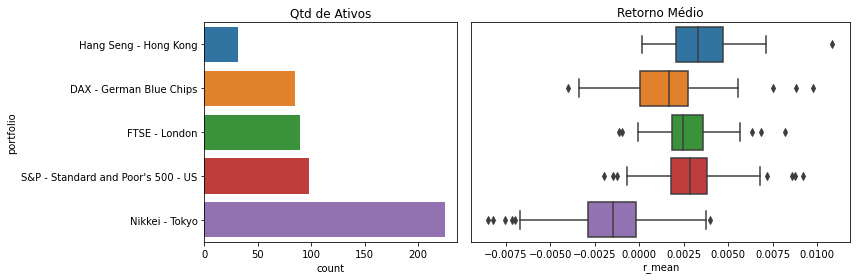

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios': [1, 1.5]})
sns.countplot(data=df_stats, y='portfolio', ax=ax[0])
ax[0].title.set_text('Qtd de Ativos')
sns.boxplot(data=df_stats, y='portfolio', x='r_mean', ax=ax[1])
ax[1].title.set_text("Retorno Médio")
ax[1].get_yaxis().set_ticks([])
ax[1].set_ylabel('')
fig.tight_layout()

### Matriz de Covariância

In [115]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j].describe().T

,count,mean,std,min,25%,50%,75%,max
port,37904.0,4.336350,1.068738,1.000000,4.000000,5.000000,5.00000,5.000000
i,37904.0,60.152728,49.736086,1.000000,20.000000,46.000000,88.00000,224.000000
j,37904.0,120.305456,62.150969,2.000000,68.000000,113.000000,178.00000,225.000000
cov,37904.0,0.388782,0.166550,-0.145815,0.258983,0.419793,0.51717,0.909412


<AxesSubplot:>

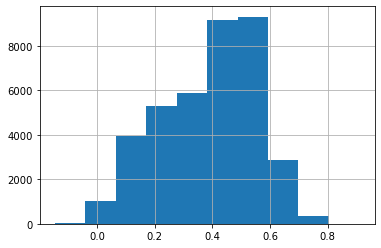

In [116]:
df_cov_mx[df_cov_mx.i!=df_cov_mx.j]['cov'].hist()

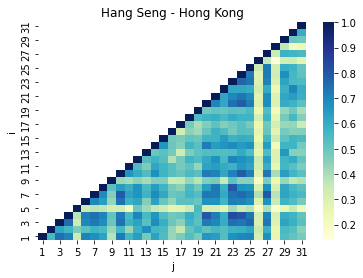

In [117]:
portfolio = 1
df_cov_pivot = df_cov_mx[df_cov_mx.port==portfolio].pivot(index='i', columns='j', values='cov')
sns.heatmap(df_cov_pivot.iloc[::-1], cmap="YlGnBu") 
plt.title(portfolios[portfolio])
ax=ax

### Fronteiras de Eficiência Irrestrira - UEF

In [118]:
uef.head()

,mean_return,var_return,port,portfolio
0,0.010865,0.004776,1,Hang Seng - Hong Kong
1,0.010861,0.004768,1,Hang Seng - Hong Kong
2,0.010857,0.004760,1,Hang Seng - Hong Kong
3,0.010853,0.004752,1,Hang Seng - Hong Kong
4,0.010849,0.004745,1,Hang Seng - Hong Kong


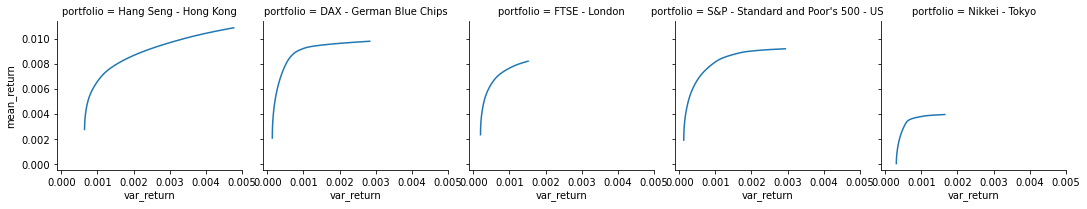

In [119]:
g = sns.relplot(data=uef, y='mean_return', x='var_return', col='portfolio', kind='line', height=3)
ax=ax

## Curvas de Aprendizado

### Avaliação do Impacto da Seed

In [120]:
all_data

,iter,obj,return,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename
0,0,0.181318,0.003336,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
1,1,0.114889,0.002894,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
2,2,0.083337,0.002723,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
3,3,0.065272,0.002633,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
4,4,0.060956,0.002612,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.007207,0.002475,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
96,96,0.009802,0.002475,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
97,97,0.007316,0.002459,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv
98,98,0.010242,0.002459,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv


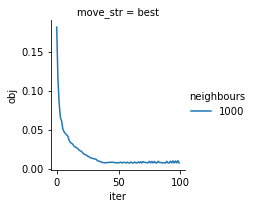

In [121]:
g = sns.FacetGrid(
    data=all_data, col='move_str', hue='neighbours')
g.map(sns.lineplot, 'iter', 'obj')
g.add_legend()
g=g

In [122]:
# g = sns.FacetGrid(
#     data=all_data, row='seed', col='selec_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Tipo de Move

In [123]:
# g = sns.FacetGrid(
#     data=all_data, row='selec_str', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

### Avaliação do Impacto do Retorno Experado

In [124]:
# g = sns.FacetGrid(
#     data=all_data, row='exp_return', col='move_str', hue='alpha')
# g.map(sns.lineplot, 'iter', 'obj')
# g.add_legend()
# g=g

## Análise Best - Portfólio 1

In [125]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [126]:
print(best_data.shape)
best_data.head()

(1, 13)


,iter,obj,return,max_iter,neighbours,alpha,exp_return,n_port,k,move_str,seed,selec_str,filename
0,99,0.007207,0.002475,100,1000,0.1,0.001,1,5,best,NaN,best,log_gls_20211115_171729_646502.csv


In [127]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1.0,99.000000,NaN,99.000000,99.000000,99.000000,99.000000,99.000000
obj,1.0,0.007207,NaN,0.007207,0.007207,0.007207,0.007207,0.007207
return,1.0,0.002475,NaN,0.002475,0.002475,0.002475,0.002475,0.002475
max_iter,1.0,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
neighbours,1.0,1000.000000,NaN,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
alpha,1.0,0.100000,NaN,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1.0,0.001000,NaN,0.001000,0.001000,0.001000,0.001000,0.001000
n_port,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
k,1.0,5.000000,NaN,5.000000,5.000000,5.000000,5.000000,5.000000
seed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


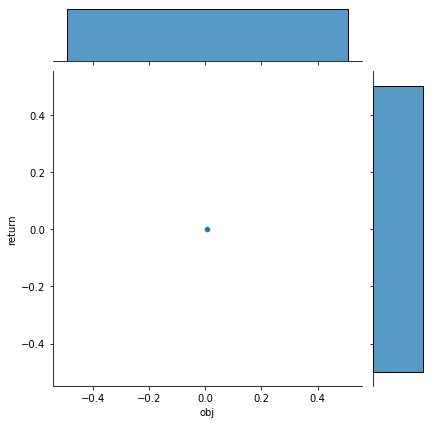

In [128]:
sns.jointplot(data=best_data, x='obj', y='return', palette='bright')

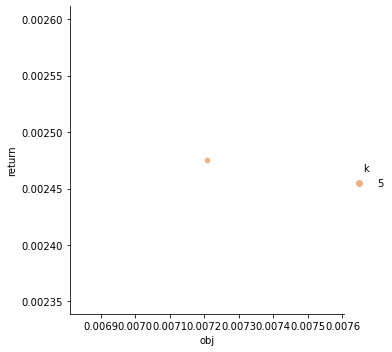

In [129]:
sns.relplot(data=best_data, x='obj', y='return', hue='k', palette='flare')

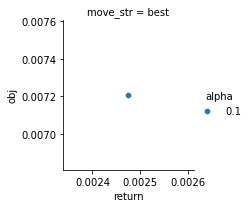

In [130]:
g = sns.FacetGrid(data=best_data, col='move_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

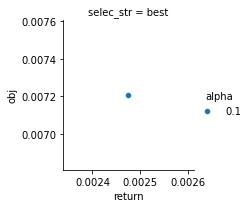

In [131]:
g = sns.FacetGrid(data=best_data, col='selec_str', hue='alpha')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

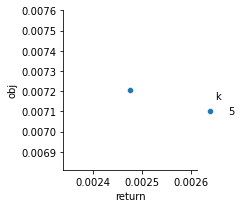

In [132]:
g = sns.FacetGrid(data=best_data, hue='k')
g.map(sns.scatterplot, 'return', 'obj')
g.add_legend()
g=g

In [133]:
best_data.describe().T

,count,mean,std,min,25%,50%,75%,max
iter,1.0,99.000000,NaN,99.000000,99.000000,99.000000,99.000000,99.000000
obj,1.0,0.007207,NaN,0.007207,0.007207,0.007207,0.007207,0.007207
return,1.0,0.002475,NaN,0.002475,0.002475,0.002475,0.002475,0.002475
max_iter,1.0,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
neighbours,1.0,1000.000000,NaN,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
alpha,1.0,0.100000,NaN,0.100000,0.100000,0.100000,0.100000,0.100000
exp_return,1.0,0.001000,NaN,0.001000,0.001000,0.001000,0.001000,0.001000
n_port,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
k,1.0,5.000000,NaN,5.000000,5.000000,5.000000,5.000000,5.000000
seed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df_stats[df_stats.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
port,31.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
i,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
r_mean,31.0,0.003504,0.002186,0.000141,0.002043,0.003286,0.004725,0.010865
r_std,31.0,0.045723,0.007296,0.035848,0.040043,0.045450,0.050112,0.069105


In [135]:
uef[uef.port==1].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_return,2000.0,0.006825,0.002334,0.002784,0.004804,0.006825,0.008845,0.010865
var_return,2000.0,0.001579,0.001116,0.000642,0.000716,0.001058,0.002150,0.004776
port,2000.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'mean_return')

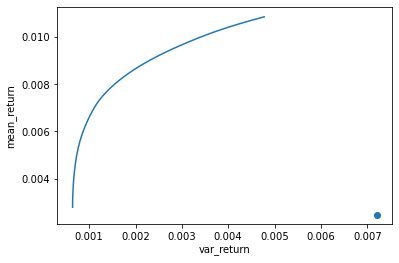

In [136]:
data = best_data[best_data['obj']<0.05]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

Text(0, 0.5, 'mean_return')

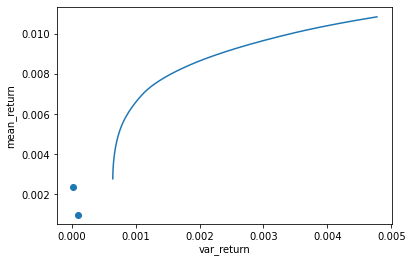

In [91]:
data = best_data[best_data['obj']<0.005]
plt.plot(uef[uef.port==1].var_return, uef[uef.port==1].mean_return)
plt.scatter(data.obj, data['return'])
plt.xlabel("var_return")
plt.ylabel("mean_return")

In [92]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .count()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

,exp_return,0.001
move_str,selec_str,
best,best,2


In [93]:
best_data.groupby(['exp_return', 'move_str', 'selec_str'], as_index=False)['obj']\
    .min()\
    .pivot(index=['move_str', 'selec_str'], columns='exp_return', values='obj')

,exp_return,0.001
move_str,selec_str,
best,best,0.000013


In [94]:
best_best_data = best_data.groupby(['exp_return'], as_index=False)['obj'].min()
print(best_best_data.shape)
best_best_data.head()

(1, 2)


,exp_return,obj
0,0.001,0.000013


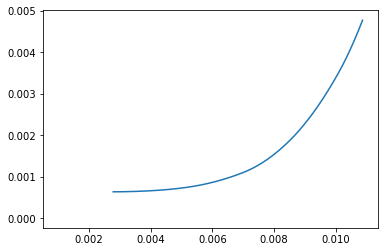

In [95]:
plt.plot(uef[uef.port==1].mean_return, uef[uef.port==1].var_return)
plt.plot(best_best_data.exp_return, best_best_data.obj)